In [ ]:
# Visual Computing in the Life Sciences
## Assignment Sheet 2

### Exercise 1 (Producing a Scatterplot Matrix, 25 Points)

In the previous assignment, you wrote a reduced dataset to disk that is limited to the benign and malignant classes and five variables that most strongly distinguish between benign and malignant samples.
This week, you will create and interpret a basic visualization of that data.
In this assignment your final visualization should be a 5 X 5 matrix whose rows and columns are the
measurements of the variables you selected last week. Diagonal cells visualize how the variables are
distributed; off-diagonal cells visualize the relationship between the values of pairs of variables.
Please proceed in the following steps and submit your final script, the final image, and answers to the
questions:


a) Each diagonal cell should contain two overlaid histograms, one for the benign and one for the
malignant class. In the histogram, variable values should be on the x axis, the frequency of
observing that value in each class should be on the y axis. Use different colors to distinguish
between the classes, and add a legend. Your visual design should make it easy to answer the
following questions (5P for implementation, 1P for justifying choice of colors, 3P for answering
questions):

- For which variable(s) you could find a range of values for which the class of the sample is
certain? Write down the ranges.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.lines import Line2D


In [9]:
##MAURICIOOO I provided the table with the class feature too :D
data=pd.read_excel('reduced_dataset.xlsx')
data.head()
variables=['thickness','uniCelS','uniCelShape','bareNuc','blaChroma']



In [10]:
benign = data[data['class']==2]
malignant = data[data['class']==4]
benign.head()

,thickness,uniCelS,uniCelShape,bareNuc,blaChroma,class
0,5,1,1,1.0,3,2
1,5,4,4,10.0,3,2
2,3,1,1,2.0,3,2
3,6,8,8,4.0,3,2
4,4,1,1,1.0,3,2


In [58]:

#Function to create an array of marker size for each point, depending on its frequency percentage
def marker_size(variable): 
    """
    variable should be the column of a dataframe for which I wish to create an array of marker sizes
    
    """
    #Create a frequency table 
    base=pd.crosstab(index=variable, columns='count',).sort_values(by='count')

    y=len(variable)

    #Determine a function for the marker size based on the ratio of occurence of the value divided by the 
    #set size: The percentage of occurence of such value in the dataset.
    
    set_size= lambda x:((x/y)*100)*4
    
    #Create a column called size, for the marker size that corresponds to each value
    base['size'] = base.apply(lambda x: set_size(base['count']))
    
    size_array=[]
    
    #create an array with marker sizes for each element in the dataset.
    for each in variable:
        size_array.append(int(base.loc[[each],['size']]['size']))
    return size_array


In [59]:
def draw_histograms(data, variables, nrows, ncols):

    #Creating the figure where the subplots will be
    fig,axes=plt.subplots(nrows,ncols,sharex=True, figsize=(20,20))
    
    #Setting up the colours for bening and malignant datasets, as well as the datasets themselves.
    c=['#0000FF','#FF0000']    
    benign = data[data['class']==2]
    malignant = data[data['class']==4]
    
    for i in range(0,5):
        
        #Naming x and y labels for the whole figure class
        axes[4,i].set_xlabel(variables[i])
        axes[i,0].set_ylabel(variables[i])
        
        y = malignant[variables[i]]

        for j in range(0,5):
            
            x = benign[variables[j]]
            
            if j==i:
            
                axes[i,j].hist(x, bins=20, alpha=0.65, label='Benign',color=c[0])
                axes[i,j].hist(y, bins=20, alpha=0.65, label='Malign',color=c[1])
            
            else:        
                
                #size is the array of arrays for the malign and bening datasets, based on the
                #frequency of each value on the WHOLE dataset
                size=np.array([[marker_size(data[variables[i]])],[marker_size(data[variables[j]])]])                
    
    
                #Overlapped scatter plots for bening and malignant datasets for each of the variables.
                axes[i,j].scatter(data[variables[i]],data[variables[j]],alpha=0.2,color=c,s=size)
                #axes[i,j].set_xlim(0,10)
                #axes[i,j].set_ylim(0,10)

    
    
    
    fig.text(0.5,0.04,'Variables', ha='center', va='center', fontsize=30)
    fig.text(0.05,0.5,'Frequency', ha='center', va='center', \
                 rotation='vertical',fontsize=30)
    
    cami = [Line2D([0], [0], marker='o', color=c[0], label='Scatter',markerfacecolor=c[0], markersize=15),\
          Line2D([0], [0], marker='o', color=c[1], label='Scatter',markerfacecolor=c[1], markersize=15)]
    
    
    fig.legend(handles=cami,labels=('Bening','Malignant'),loc='upper right',prop={'size': 16})
    plt.show()

    return


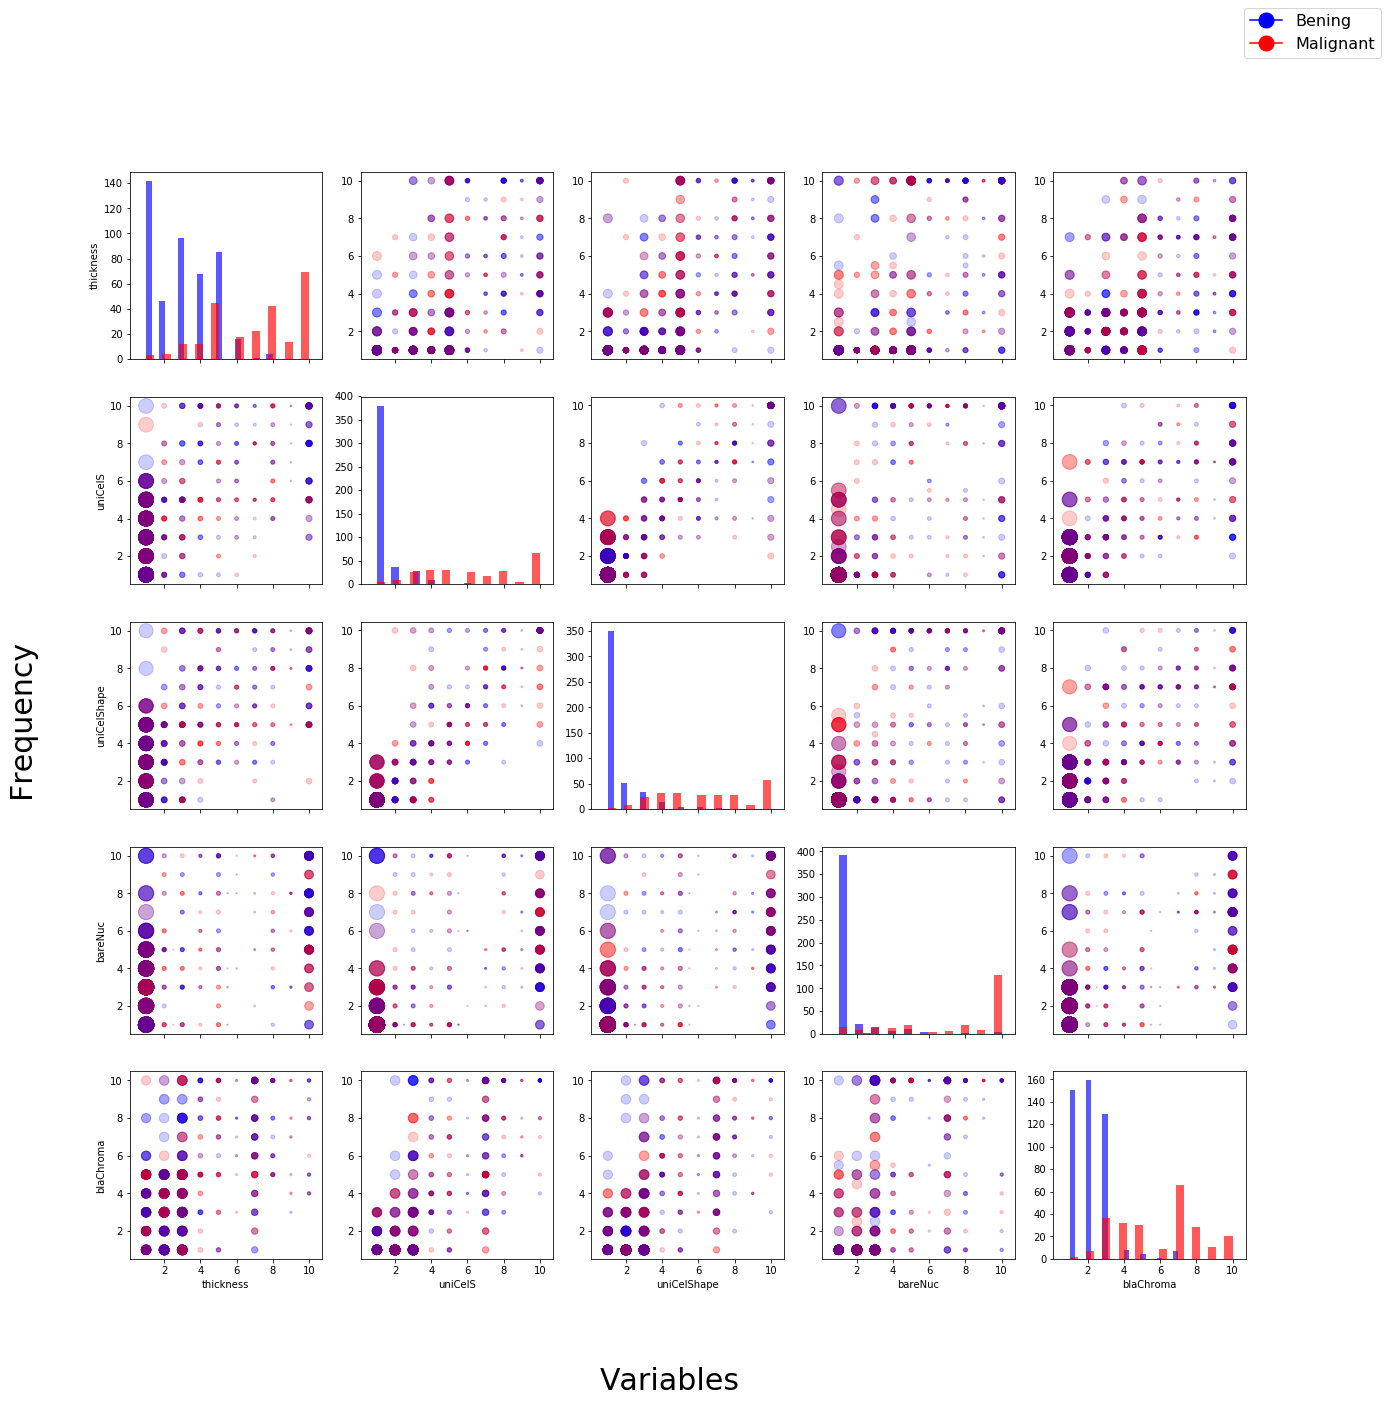

In [60]:
draw_histograms(data,variables,5,5)
